### Dataset sulla qualità dei vini

This dataset is related to the red variants of the Portuguese wine "Vinho Verde". The dataset describes the quantity of various chemical substances present in the wine and allows to identify their effect on its quality. The dataset is available on Kaggle at the URL:

https://www.kaggle.com/datasets/yasserh/wine-quality-dataset

In [1]:
%pip install pandas matplotlib seaborn tensorflow scikit-learn --no-cache-dir

You should consider upgrading via the '/Users/giumast/.pyenv/versions/3.10.0/bin/python3.10 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [27]:
# library import

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf


plt.rcParams["figure.dpi"] = 150

In [28]:
# load the dataset

df = pd.read_csv('data/WineQT.csv')

In [29]:
df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5,6
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7,8
9,6.7,0.58,0.08,1.8,0.097,15.0,65.0,0.9959,3.28,0.54,9.2,5,10


In [30]:
# drop id column

df = df.drop('Id', axis=1)

In [31]:
# print number of rows and columns

print(f"Available examples: {len(df)}, each with {len(df.columns)} features.")


Available examples: 1143, each with 12 features.


In [32]:
# statistical information about available feataures

df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1143.0,8.311111,1.747595,4.60000,7.10000,7.90000,9.100000,15.90000
volatile acidity,1143.0,0.531339,0.179633,0.12000,0.39250,0.52000,0.640000,1.58000
citric acid,1143.0,0.268364,0.196686,0.00000,0.09000,0.25000,0.420000,1.00000
residual sugar,1143.0,2.532152,1.355917,0.90000,1.90000,2.20000,2.600000,15.50000
chlorides,1143.0,0.086933,0.047267,0.01200,0.07000,0.07900,0.090000,0.61100
free sulfur dioxide,1143.0,15.615486,10.250486,1.00000,7.00000,13.00000,21.000000,68.00000
total sulfur dioxide,1143.0,45.914698,32.782130,6.00000,21.00000,37.00000,61.000000,289.00000
density,1143.0,0.996730,0.001925,0.99007,0.99557,0.99668,0.997845,1.00369
pH,1143.0,3.311015,0.156664,2.74000,3.20500,3.31000,3.400000,4.01000
sulphates,1143.0,0.657708,0.170399,0.33000,0.55000,0.62000,0.730000,2.00000


In [33]:
# generic info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 107.3 KB


In [34]:
# are there any NaN values?

df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [35]:
# unique values for each feature

df.nunique()

fixed acidity            91
volatile acidity        135
citric acid              77
residual sugar           80
chlorides               131
free sulfur dioxide      53
total sulfur dioxide    138
density                 388
pH                       87
sulphates                89
alcohol                  61
quality                   6
dtype: int64

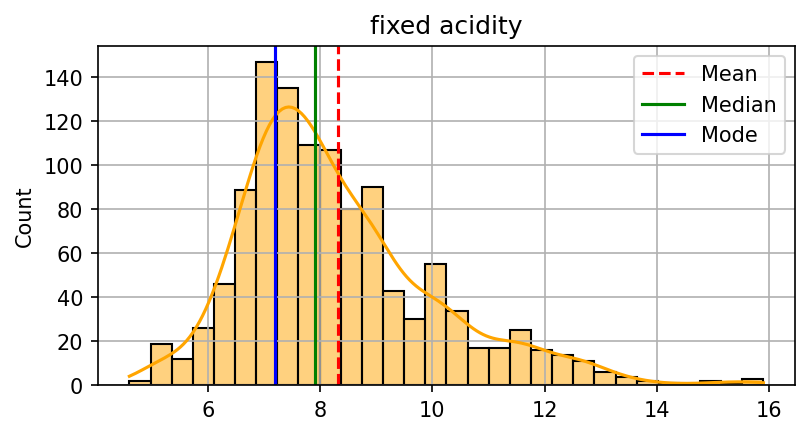

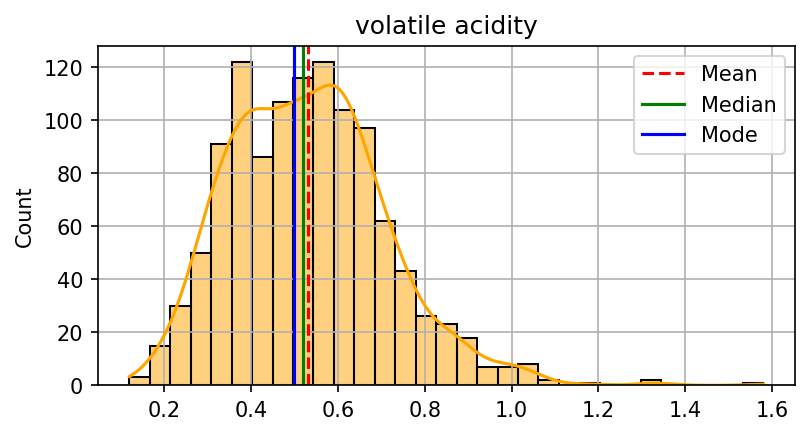

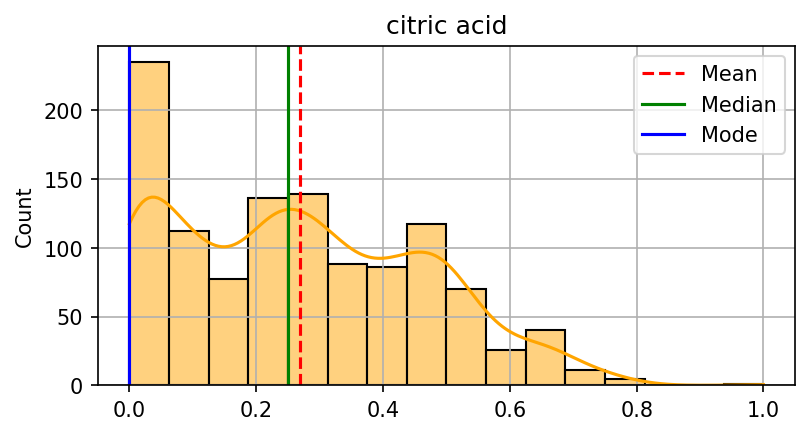

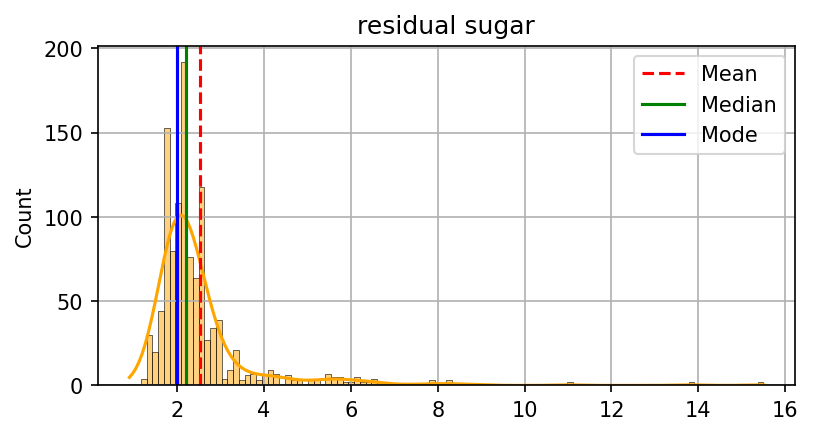

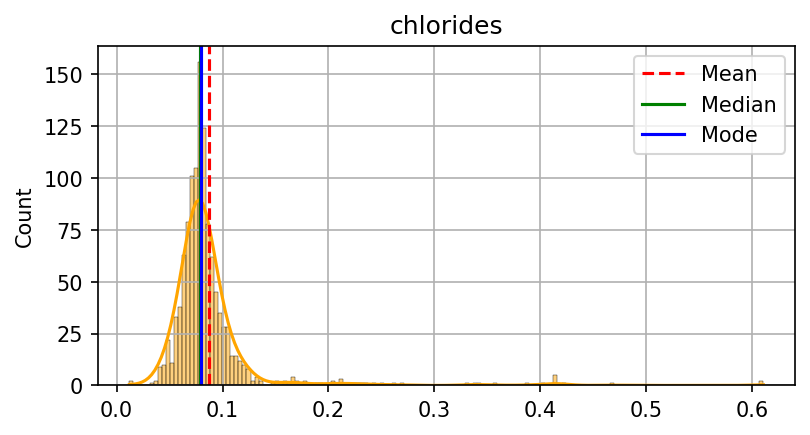

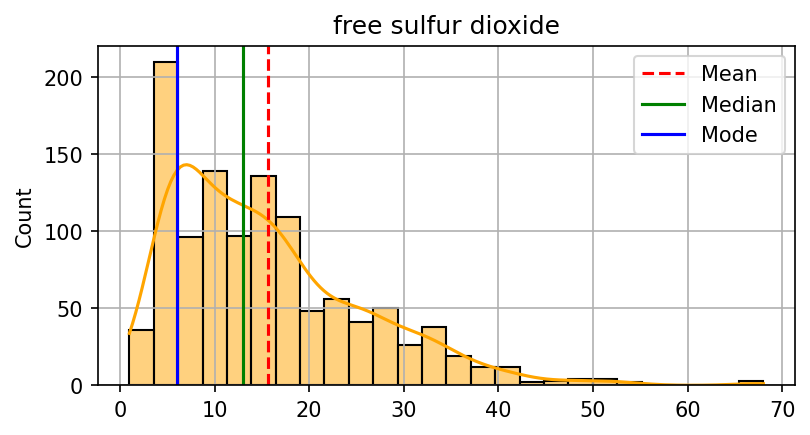

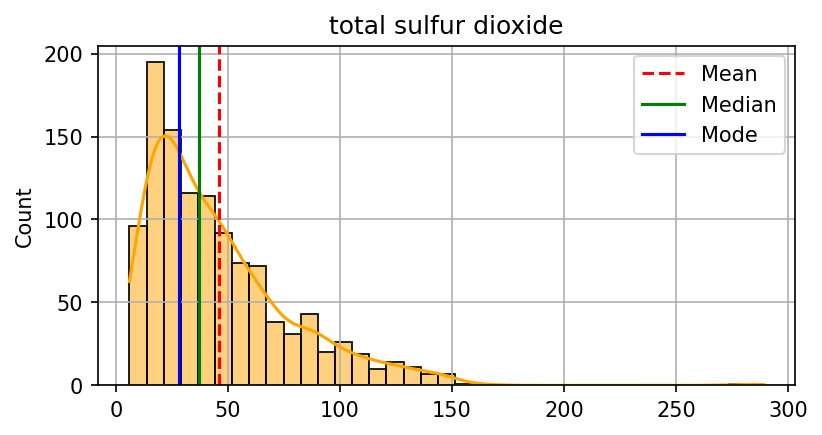

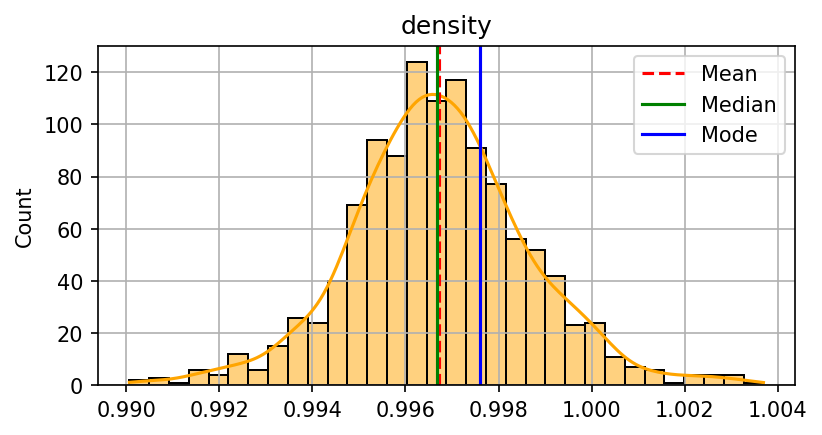

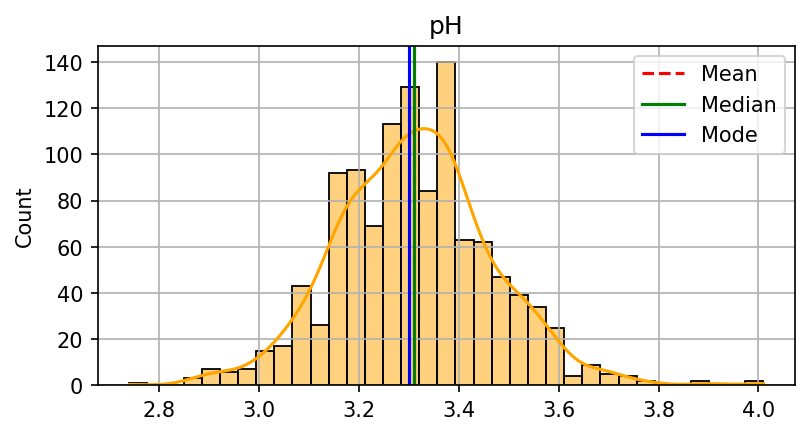

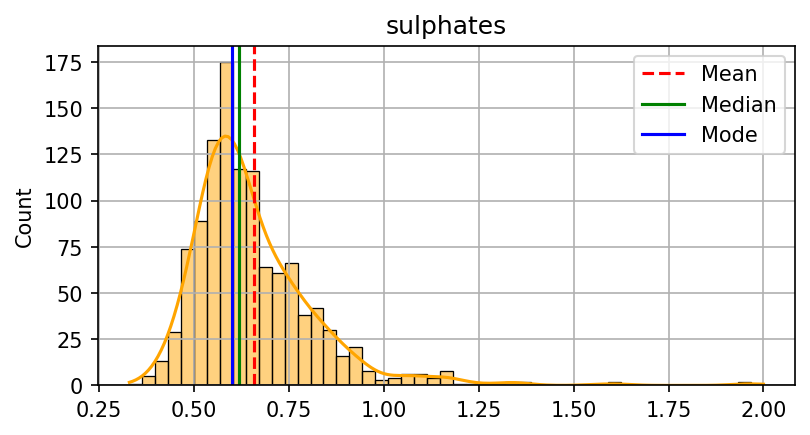

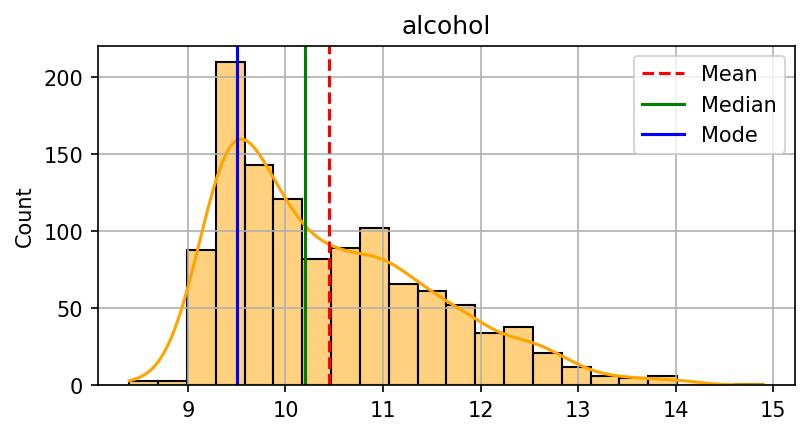

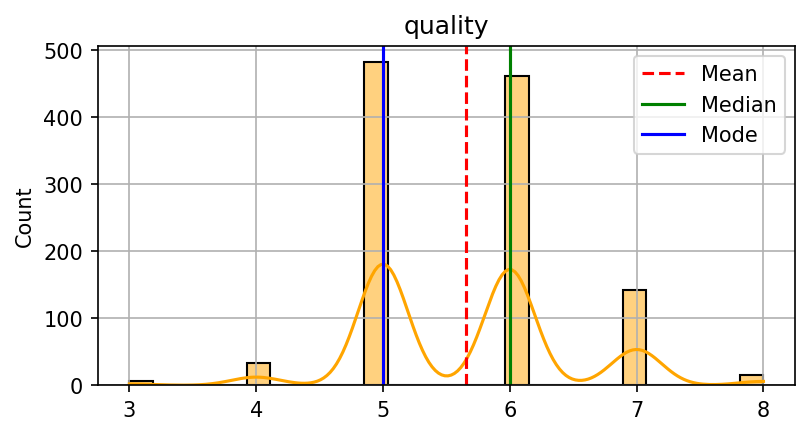

In [36]:
# distributions of each feature
# -> histograms

for col in df.columns:
    f, (ax1) = plt.subplots(1, 1, figsize=(6, 3) )
    v_dist_1 = df[col].values
    sns.histplot(v_dist_1, ax=ax1, color='orange', kde=True)

    media = df[col].mean()
    mediana = df[col].median()
    moda = df[col].mode().values[0]

    ax1.axvline(media, color='r', linestyle='--', label="Mean")
    ax1.axvline(mediana, color='g', linestyle='-', label="Median")
    ax1.axvline(moda, color='b', linestyle='-', label="Mode")
    ax1.legend()
    plt.grid()
    plt.title(col)

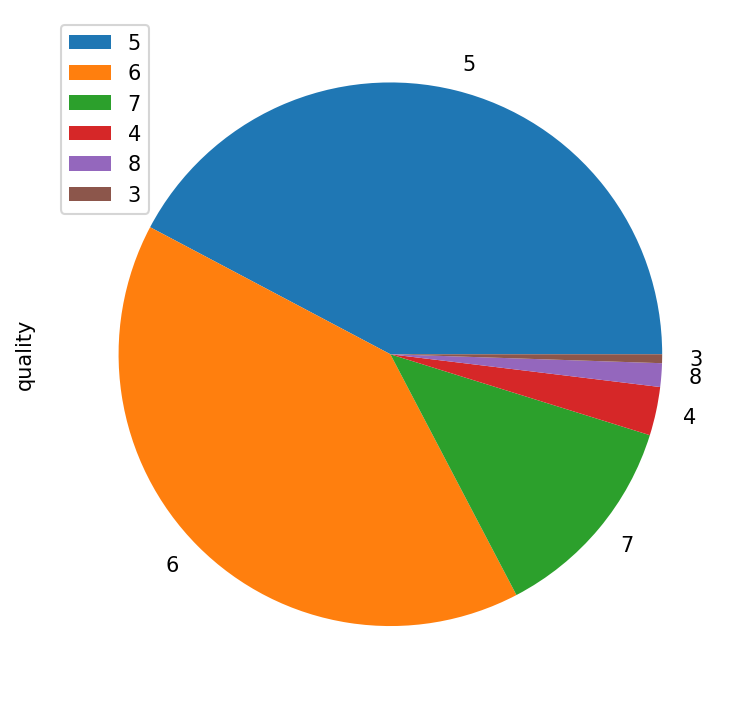

In [37]:
# analisi della distribuzione degli esempi disponibili
# relativamente alla qualità di ognuno

plt.figure(figsize=(6, 6))
df.quality.value_counts().plot(kind='pie')
plt.legend()
plt.show()

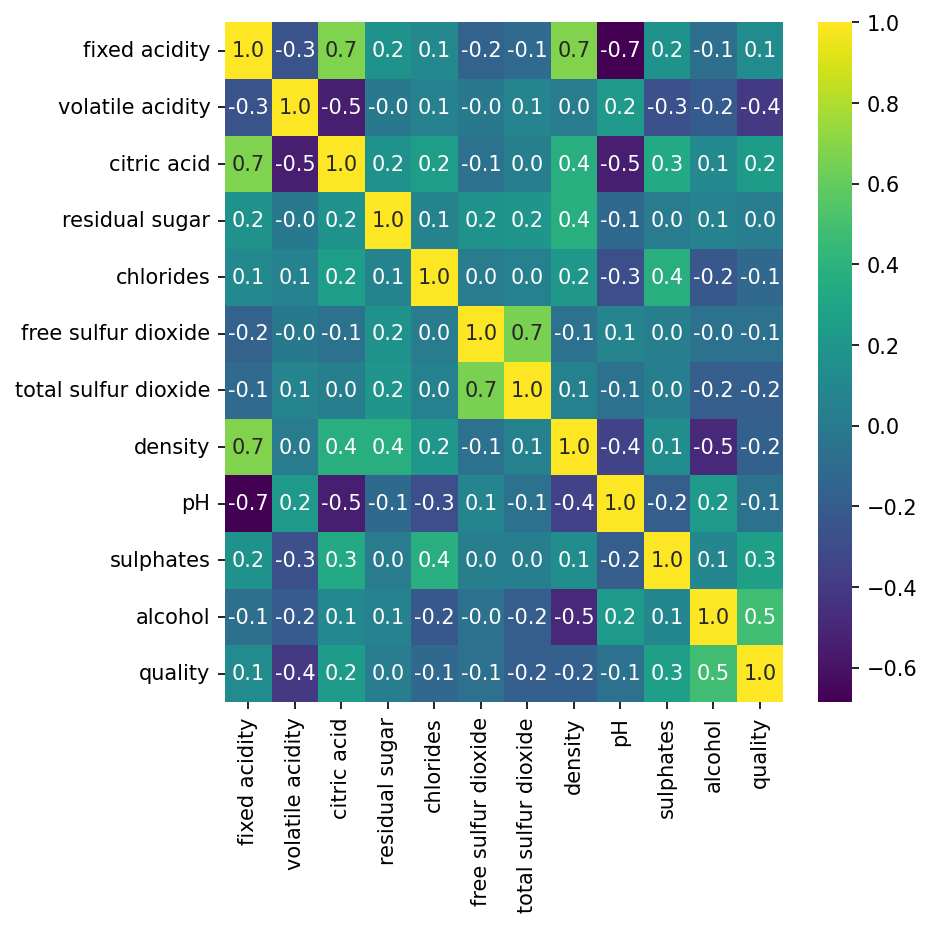

In [38]:
# analisi delle eventuali correlazioni
# tramite una mappa di correlazione

plt.figure(figsize=(6, 6), dpi=150)
corr = df.corr()
sns.heatmap(
    corr, 
    xticklabels=corr.columns, 
    yticklabels=corr.columns, 
    cmap='viridis',
    annot=True,
    fmt=".1f"
)
plt.show()

## creazione del dataset

In [39]:
x = df.drop('quality', axis=1).values
y = df.quality.values

print('x', type(x), x.shape)
print('y', type(y), y.shape)

x <class 'numpy.ndarray'> (1143, 11)
y <class 'numpy.ndarray'> (1143,)


In [40]:
split = 1000

x_train = x[:split]
y_train = y[:split]

x_test = x[split:]
y_test = y[split:]

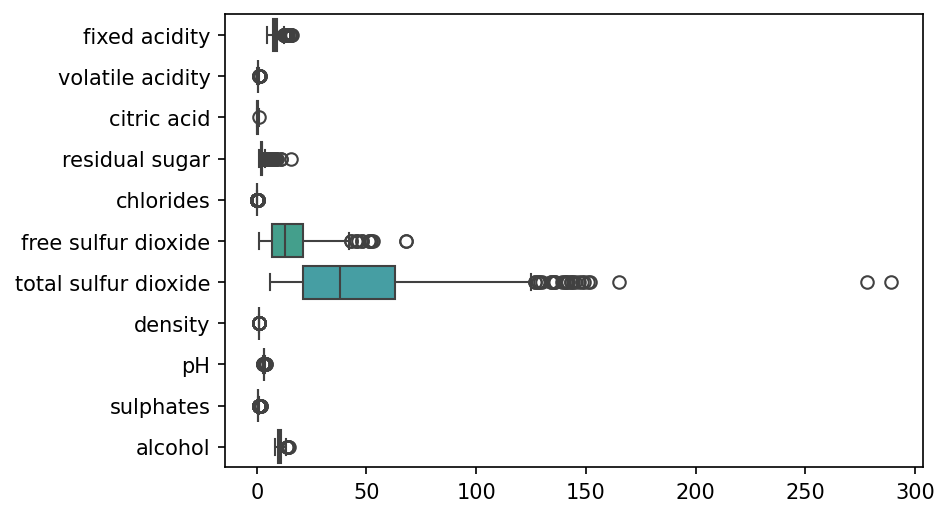

In [41]:
sns.boxplot(data = pd.DataFrame(x_train, columns=df.drop('quality', axis=1).columns), orient = "h")
plt.show()

In [42]:
scaler = MinMaxScaler()
scaler.fit(x_train)

x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

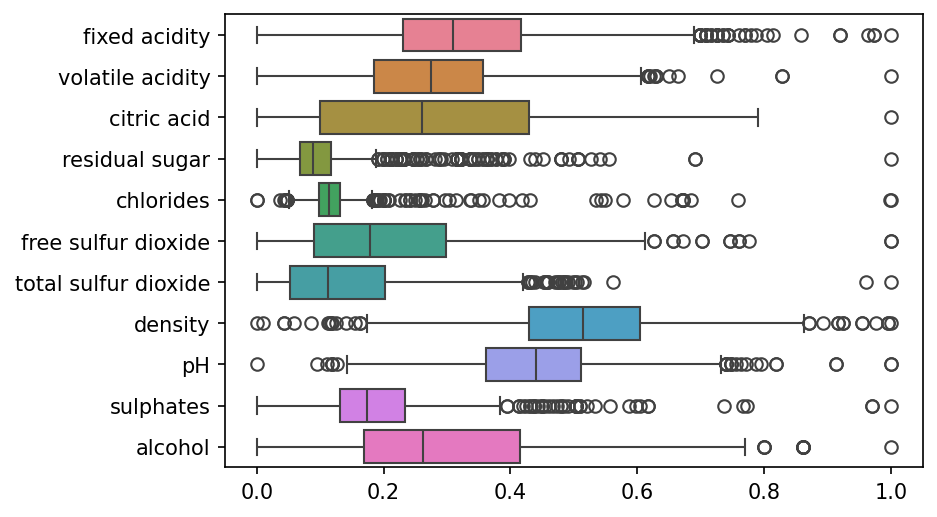

In [43]:
sns.boxplot(data = pd.DataFrame(x_train, columns=df.drop('quality', axis=1).columns), orient = "h")
plt.show()

## definizione modello

In [55]:
input = tf.keras.Input(shape=(len(x_train[0])))

layer_1 = tf.keras.layers.Dense(8, activation='relu')(input)
layer_2 = tf.keras.layers.Dense(8, activation='relu')(layer_1)
layer_3 = tf.keras.layers.Dense(8, activation='relu')(layer_2)

output = tf.keras.layers.Dense(1)(layer_3)

model = tf.keras.Model(inputs=input, outputs=output)
model.compile(
    optimizer=tf.keras.optimizers.SGD(),
    loss=tf.keras.losses.mean_squared_error,
    metrics=tf.keras.metrics.mean_absolute_error
)

model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 11)]              0         
                                                                 
 dense_8 (Dense)             (None, 8)                 96        
                                                                 
 dense_9 (Dense)             (None, 8)                 72        
                                                                 
 dense_10 (Dense)            (None, 8)                 72        
                                                                 
 dense_11 (Dense)            (None, 1)                 9         
                                                                 
Total params: 249 (996.00 Byte)
Trainable params: 249 (996.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [56]:
# addestramento

log = model.fit(
    x_train,
    y_train,
    epochs=100,
    validation_data=(x_test, y_test),
    verbose=2,
    batch_size=64
)

Epoch 1/100
16/16 - 0s - loss: 14.7193 - mean_absolute_error: 3.3358 - val_loss: 0.7653 - val_mean_absolute_error: 0.7032 - 177ms/epoch - 11ms/step
Epoch 2/100
16/16 - 0s - loss: 0.6101 - mean_absolute_error: 0.6387 - val_loss: 0.7390 - val_mean_absolute_error: 0.6974 - 18ms/epoch - 1ms/step
Epoch 3/100
16/16 - 0s - loss: 0.5957 - mean_absolute_error: 0.6306 - val_loss: 0.7216 - val_mean_absolute_error: 0.6883 - 18ms/epoch - 1ms/step
Epoch 4/100
16/16 - 0s - loss: 0.5854 - mean_absolute_error: 0.6242 - val_loss: 0.7110 - val_mean_absolute_error: 0.6811 - 18ms/epoch - 1ms/step
Epoch 5/100
16/16 - 0s - loss: 0.5758 - mean_absolute_error: 0.6186 - val_loss: 0.7059 - val_mean_absolute_error: 0.6782 - 17ms/epoch - 1ms/step
Epoch 6/100
16/16 - 0s - loss: 0.5707 - mean_absolute_error: 0.6175 - val_loss: 0.6874 - val_mean_absolute_error: 0.6685 - 18ms/epoch - 1ms/step
Epoch 7/100
16/16 - 0s - loss: 0.5548 - mean_absolute_error: 0.6056 - val_loss: 0.6879 - val_mean_absolute_error: 0.6675 - 18ms

Epoch 58/100
16/16 - 0s - loss: 0.4087 - mean_absolute_error: 0.5002 - val_loss: 0.5576 - val_mean_absolute_error: 0.5688 - 16ms/epoch - 1ms/step
Epoch 59/100
16/16 - 0s - loss: 0.4107 - mean_absolute_error: 0.5026 - val_loss: 0.5486 - val_mean_absolute_error: 0.5596 - 17ms/epoch - 1ms/step
Epoch 60/100
16/16 - 0s - loss: 0.4086 - mean_absolute_error: 0.4997 - val_loss: 0.5474 - val_mean_absolute_error: 0.5580 - 16ms/epoch - 1ms/step
Epoch 61/100
16/16 - 0s - loss: 0.4103 - mean_absolute_error: 0.5009 - val_loss: 0.5795 - val_mean_absolute_error: 0.5830 - 18ms/epoch - 1ms/step
Epoch 62/100
16/16 - 0s - loss: 0.4090 - mean_absolute_error: 0.5010 - val_loss: 0.5549 - val_mean_absolute_error: 0.5682 - 20ms/epoch - 1ms/step
Epoch 63/100
16/16 - 0s - loss: 0.4082 - mean_absolute_error: 0.5028 - val_loss: 0.5512 - val_mean_absolute_error: 0.5649 - 17ms/epoch - 1ms/step
Epoch 64/100
16/16 - 0s - loss: 0.4071 - mean_absolute_error: 0.4989 - val_loss: 0.5527 - val_mean_absolute_error: 0.5659 - 

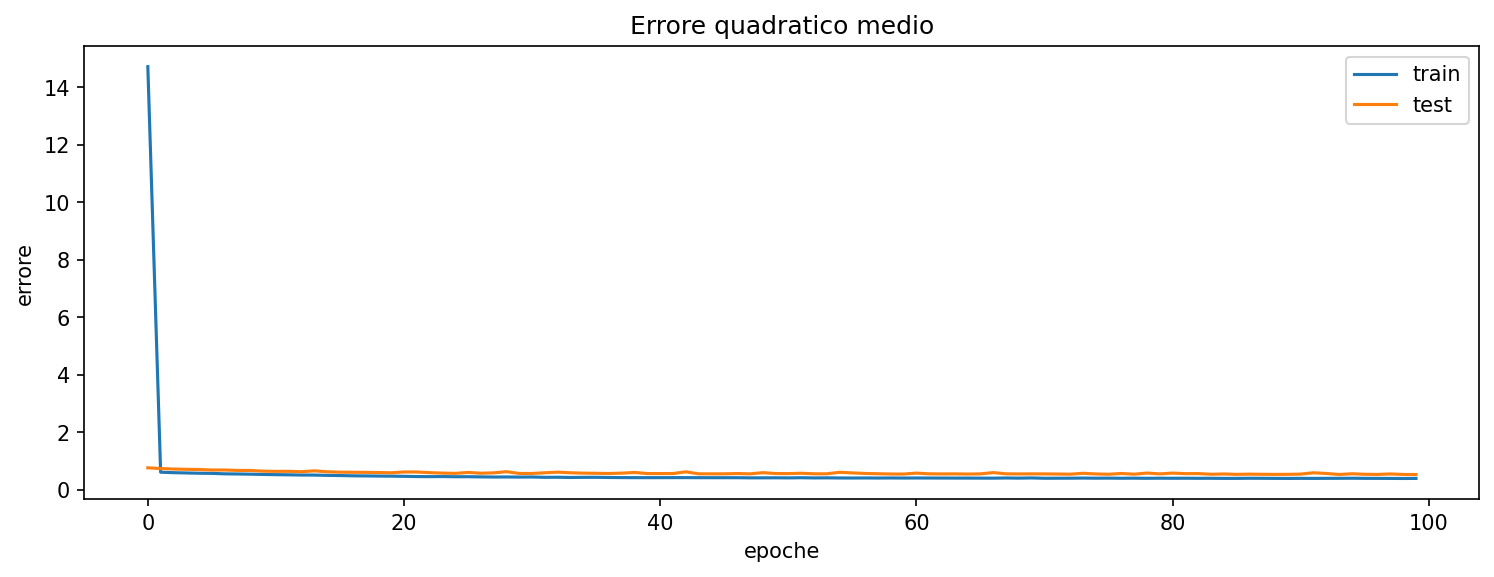

In [57]:
# visualizzazione dell'addestramento

plt.figure(figsize=(12, 4))
plt.title('Errore quadratico medio')
plt.plot(log.history['loss'], label='train')
plt.plot(log.history['val_loss'], label='test')
plt.xlabel('epoche')
plt.ylabel('errore')
plt.legend()
plt.show()

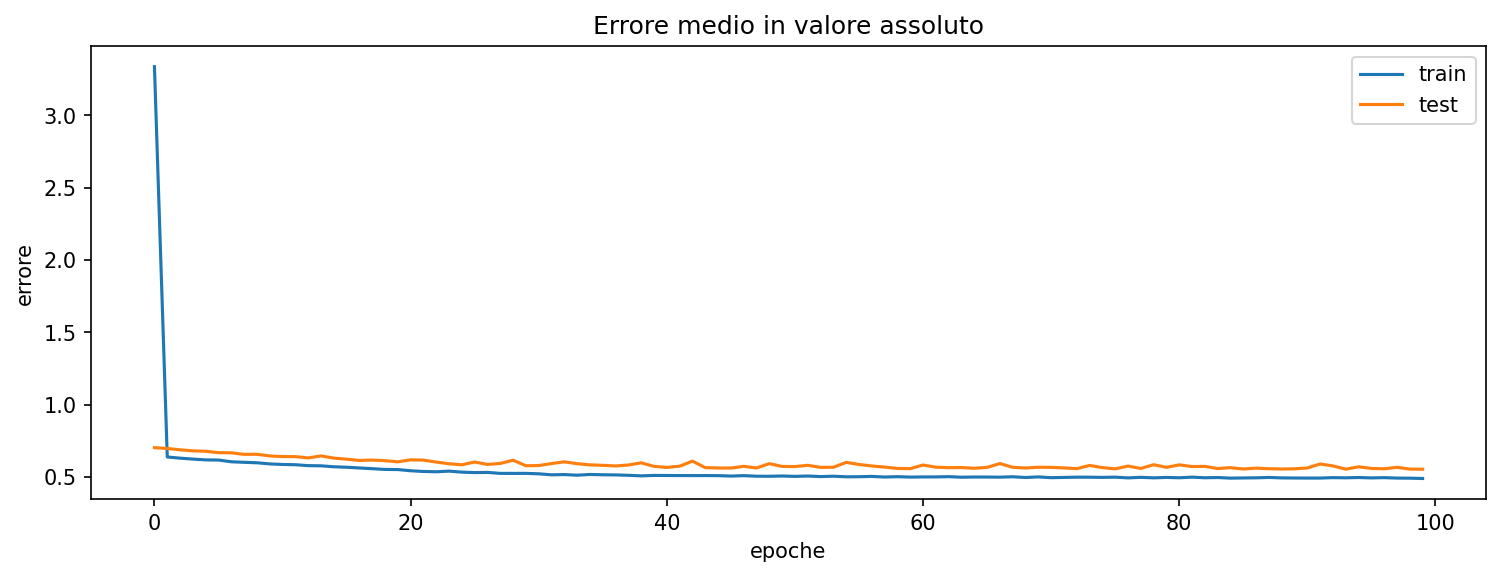

In [58]:
plt.figure(figsize=(12, 4))
plt.title('Errore medio in valore assoluto')
plt.plot(log.history['mean_absolute_error'], label='train')
plt.plot(log.history['val_mean_absolute_error'], label='test')
plt.xlabel('epoche')
plt.ylabel('errore')
plt.legend()
plt.show()

In [59]:
evaluated = model.evaluate(x_test, y_test)
evaluated

5/5 [==============================] - 0s 972us/step - loss: 0.5303 - mean_absolute_error: 0.5541


[0.530319333076477, 0.5540792942047119]

In [60]:
preds = model.predict(x_test)

5/5 [==============================] - 0s 601us/step


In [61]:
for _ in range(10):
    id = np.random.randint(0, len(x_test))
    print('predicted:', round(preds[id][0]), '\treal:', y_test[id])
    print('confidence: ', int(preds[id][0] - evaluated[1]), '-', int(preds[id][0] + evaluated[1]))
    print('\n')

predicted: 6 	real: 6
confidence:  5 - 6


predicted: 6 	real: 5
confidence:  5 - 6


predicted: 7 	real: 6
confidence:  5 - 7


predicted: 5 	real: 5
confidence:  4 - 5


predicted: 6 	real: 8
confidence:  5 - 6


predicted: 5 	real: 3
confidence:  4 - 5


predicted: 5 	real: 6
confidence:  4 - 5


predicted: 5 	real: 5
confidence:  4 - 5


predicted: 5 	real: 5
confidence:  4 - 5


predicted: 5 	real: 6
confidence:  4 - 5




In [62]:
model.save('model/model.h5')

/Users/giumast/.pyenv/versions/3.10.0/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [54]:
x_test[0]

array([0.30973451, 0.11643836, 0.36      , 0.0890411 , 0.06010017,
       0.50746269, 0.16607774, 0.37547601, 0.41732283, 0.40718563,
       0.61538462])